### 1. Packages 

First, let's run the cell below to import all the packages that you will need.
- [numpy](https://numpy.org/) is the fundamental package for scientific computing with Python.
- [matplotlib](http://matplotlib.org) is a popular library to plot graphs in Python.
- [tensorflow](https://www.tensorflow.org/) a popular platform for machine learning.

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import parameter

### 2. Dataset

In [2]:
import tensorflow_datasets as tfds

(ds_train, ds_validation), ds_info = tfds.load(
    'imagenette',
    split=['train', 'validation'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)


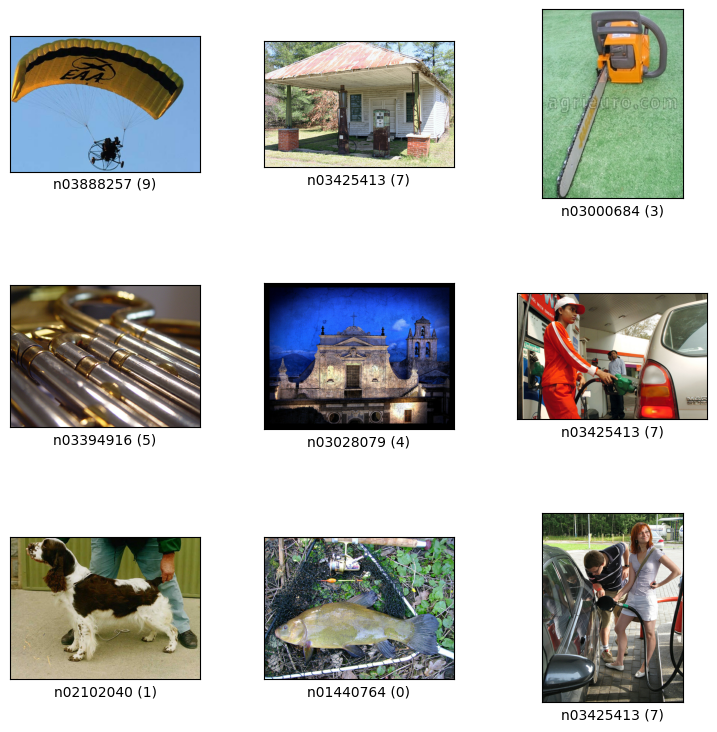

In [3]:
fig = tfds.show_examples(ds_train, ds_info)

In [4]:
def normalize_img(image, label):
    image = tf.image.resize(image, (parameter.IMAGE_SIZE, parameter.IMAGE_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_train = ds_train.cache()
ds_train = ds_train.shuffle(ds_info.splits['train'].num_examples)
ds_train = ds_train.batch(parameter.BATCH_SIZE)
ds_train = ds_train.prefetch(tf.data.experimental.AUTOTUNE)

ds_validation = ds_validation.map(normalize_img, num_parallel_calls=tf.data.experimental.AUTOTUNE)
ds_validation = ds_validation.batch(parameter.BATCH_SIZE)
ds_validation = ds_validation.prefetch(tf.data.experimental.AUTOTUNE)



### 3. Training

How to run:
- Change parameter

In [5]:
# Dataset
parameter.DATASET = 'imagenette'
parameter.numclasses = 10

# Model
parameter.CONV_DO_RATE = 0.1 #[0.05, 0.1, 0.3, 0.5]
parameter.LINEAR_DO_RATE = 0.3 #[0.05, 0.1, 0.3, 0.5]

In [6]:
import tensorflow_datasets as tfds

import Models.CNN_Model
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

model = Models.CNN_Model.Model(parameter.numclasses)


0.3 0.1
Model: "my_basic_CNN_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 64, 64, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                    

In [9]:
history = model.fit(
    ds_train,
    validation_data=ds_validation,
    epochs=1,
    verbose=2,
)

148/148 - 241s - loss: 1.2393 - accuracy: 0.5941 - val_loss: 1.7689 - val_accuracy: 0.4239 - 241s/epoch - 2s/step


### 4. Test

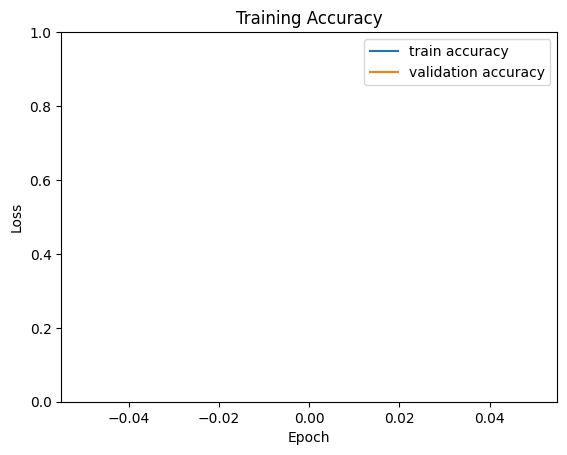

In [11]:
plt.plot(history.history['accuracy'], label="train accuracy")
plt.plot(history.history['val_accuracy'], label="validation accuracy")
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.legend()
plt.savefig(fname=f'batch_size_{parameter.BATCH_SIZE}-{parameter.CONV_DO_RATE}-{parameter.LINEAR_DO_RATE}.png')
plt.show()
